# Mining Twitter

Twitter implements OAuth 1.0A as its standard authentication mechanism, and in order to use it to make requests to Twitter's API, you'll need to go to https://developer.twitter.com/en/apps and create a sample application. It is possible that Twitter no longer supports sandboxed applications and you may need to submit a request for permission to develop an app on Twitter.

There are four primary identifiers you'll need to note for an OAuth 1.0A workflow: consumer key, consumer secret, access token, and access token secret. Note that you will need an ordinary Twitter account in order to login, create an app, and get these credentials.

<img src="resources/ch01-twitter/images/Twitter-AppCredentials.png" width="600px">

If you are running this code on Binder or from the Docker container, you should just be able to execute the code in this notebook without any worries whatsoever about installing dependencies. If you are running the code from your own development envioronment, however, be advised that these examples in this chapter take advantage of a Python package called [twitter](https://github.com/sixohsix/twitter) to make API calls. You can install this package in a terminal with [pip](https://pypi.python.org/pypi/pip) with the command `pip install twitter`, preferably from within a [Python virtual environment](https://pypi.python.org/pypi/virtualenv). 

Once installed, you should be able to open up a Python interpreter (or better yet, your [IPython](http://ipython.org/) interpreter) and get rolling.

## Authorizing an application to access Twitter account data

In [1]:
import twitter
import tweepy

# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

CONSUMER_KEY = 'ODk5gryR06dBKI8vacj6Da8ye'
CONSUMER_SECRET = '78veWVBkzuKXgSLXE5tZkd9Zsp6wcATeHddqrj4BN9AQKwbdG4'
OAUTH_TOKEN = '33583902-pDEIAsHgWplGZR0o3yb0AhcaodBYyrVnUPRhw0QDn'
OAUTH_TOKEN_SECRET = '3OZRanRZRBUgiEALdHxqwUcoG6w8Az8A7Fj22t7OGjF7G'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

auth2 = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth2.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

twitter_api = twitter.Twitter(auth=auth)
api = tweepy.API(auth2)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

## Retrieving trends

In [2]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print(world_trends)
print()
print(us_trends)

[{'trends': [{'name': 'タモリ倶楽部', 'url': 'http://twitter.com/search?q=%E3%82%BF%E3%83%A2%E3%83%AA%E5%80%B6%E6%A5%BD%E9%83%A8', 'promoted_content': None, 'query': '%E3%82%BF%E3%83%A2%E3%83%AA%E5%80%B6%E6%A5%BD%E9%83%A8', 'tweet_volume': 34557}, {'name': '#猫の日', 'url': 'http://twitter.com/search?q=%23%E7%8C%AB%E3%81%AE%E6%97%A5', 'promoted_content': None, 'query': '%23%E7%8C%AB%E3%81%AE%E6%97%A5', 'tweet_volume': 866204}, {'name': '空耳アワー', 'url': 'http://twitter.com/search?q=%E7%A9%BA%E8%80%B3%E3%82%A2%E3%83%AF%E3%83%BC', 'promoted_content': None, 'query': '%E7%A9%BA%E8%80%B3%E3%82%A2%E3%83%AF%E3%83%BC', 'tweet_volume': None}, {'name': '#ねこの日', 'url': 'http://twitter.com/search?q=%23%E3%81%AD%E3%81%93%E3%81%AE%E6%97%A5', 'promoted_content': None, 'query': '%23%E3%81%AD%E3%81%93%E3%81%AE%E6%97%A5', 'tweet_volume': 167676}, {'name': '#あなたの猫度診断', 'url': 'http://twitter.com/search?q=%23%E3%81%82%E3%81%AA%E3%81%9F%E3%81%AE%E7%8C%AB%E5%BA%A6%E8%A8%BA%E6%96%AD', 'promoted_content': None, 'query':

In [3]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

タモリ倶楽部
#猫の日
空耳アワー
#ねこの日
#あなたの猫度診断
#乃木坂11thバスラ全体ライブ
放送40年
マニアック企画
#يوم_التاسيس
笑瓶さん
TXT NEW OST
みくにゃん
ジェッカス
急性大動脈解離
ダンプラ
生粋の猫
猫っぷり
猫度80
本物のネコちゃん
猫度100
恋ダンス
星野源P
タモさん
ショウヘイヘーイ
スポニチアネックス
猫系女子
猫ちゃん
猫系男子
猫度50
Prabowo Pilihan Terbaik
Iya Mending Prabowo
Di Dekade 08 Infonya
モバイルICOCA
ネコの日
ヨントン
猫の風上
ファッション猫
猫度20
シャプマ
Ash Wednesday
俺の嫁コール
テレビ朝日
スポーツ報知
デレステ
レイちゃん
レール破断
チャンミ
Wordle 613 X
プリンセスデー
しょうへい


In [4]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

#ThePayoff
Wordle 613 X
#twug
Tommie
#JJK214
Adin Ross
Daily Quordle 394
Yuji
#RHONJ
#JJKSpoilers
Natalie
Toy Story
Vivek
Mulan
Francesca
Marquette
Fresno
Ash Wednesday
Creighton
Megumi
Grand Jury
Ratatouille
Hannah Montana
GHOST IN THE MACHINE
THEY THREW BEANS ON HIM
Finding Nemo
Ines
Gege
Melissa
Jeff Anderson
Teresa
Dorow
Tokoyami
South Side
Emily Kohrs
Saginaw
Angela Davis
Tyler Kolek
Weverse
García Luna
The Parkers
Dan Kelly
Princess and the Frog
Kariselle
Tom Izzo
Physical 100
The Whale
Shaka Smart
Janet Protasiewicz
Patrick Kane


In [5]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'Ash Wednesday', 'Wordle 613 X'}


## Anatomy of a Tweet

In [6]:
import json

# Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#MothersDay' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
{
 "created_at": "Wed Feb 22 09:12:19 +0000 2023",
 "id": 1628321776966017024,
 "id_str": "1628321776966017024",
 "text": "Spring Ornament, Papa Gift, Love Nana, Nana, https://t.co/WCebS3CB58 #nana #personalized #present #scrabble\u2026 https://t.co/VgKEIcmUpX",
 "truncated": true,
 "entities": {
  "hashtags": [
   {
    "text": "nana",
    "indices": [
     69,
     74
    ]
   },
   {
    "text": "personalized",
    "indices": [
     75,
     88
    ]
   },
   {
    "text": "present",
    "indices": [
     89,
     97
    ]
   },
   {
    "text": "scrabble",
    "indices": [
     98,
     107
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [],
  "urls": [
   {
    "url": "https://t.co/WCebS3CB58",
    "expanded_url": "https://etsy.me/36IH431",
    "display_url": "etsy.me/36IH431",
    "indices": [
     45,
     68
    ]
   },
   {
    "url": "https://t.co/VgKEIcmUpX"

In [7]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


Spring Ornament, Papa Gift, Love Nana, Nana, https://t.co/WCebS3CB58 #nana #personalized #present #scrabble… https://t.co/VgKEIcmUpX
Favorites:  0
Retweets:  0

RT @ruthbeckart: Mother’s Day is Sunday 19th March.

I have #MothersDay2023 cards on my @Etsy shop with a stunning @Arsenal Theme.

£4.50 e…
Favorites:  0
Retweets:  7

RT @PlanetRandomUK: Tiger Eye Tree of Life Gemstone Necklace https://t.co/VkRUChJeL3 #tigereye #gemstones #silverplated #jewellery #necklac…
Favorites:  0
Retweets:  1

RT @DaisyFordDesign: A Pink Flower and Two Blue Butterflies: 6" x 9" Notebook https://t.co/0CDmvqYAmp via @amazon #Notebook #journal #diary…
Favorites:  0
Retweets:  4

RT @DaisyFordDesign: Breathtaking Pink Roses: 6" x 9" Lined Notebook https://t.co/szgmoCPbxX via @amazon #Notebook #journal #diary #writing…
Favorites:  0
Retweets:  4

Get Mum Pretty In Pink!#gin #manchester #ginlovers #Mothersday #ginmeup #ginforever #ginliqueurs #manchesterbars https://t.co/vgWuxz3U4g
Favorites:  0
Retweets:  

## Extracting text, screen names, and hashtags from tweets

In [8]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "Spring Ornament, Papa Gift, Love Nana, Nana, https://t.co/WCebS3CB58 #nana #personalized #present #scrabble\u2026 https://t.co/VgKEIcmUpX",
 "RT @ruthbeckart: Mother\u2019s Day is Sunday 19th March.\n\nI have #MothersDay2023 cards on my @Etsy shop with a stunning @Arsenal Theme.\n\n\u00a34.50 e\u2026",
 "RT @PlanetRandomUK: Tiger Eye Tree of Life Gemstone Necklace https://t.co/VkRUChJeL3 #tigereye #gemstones #silverplated #jewellery #necklac\u2026",
 "RT @DaisyFordDesign: A Pink Flower and Two Blue Butterflies: 6\" x 9\" Notebook https://t.co/0CDmvqYAmp via @amazon #Notebook #journal #diary\u2026",
 "RT @DaisyFordDesign: Breathtaking Pink Roses: 6\" x 9\" Lined Notebook https://t.co/szgmoCPbxX via @amazon #Notebook #journal #diary #writing\u2026"
]
[
 "ruthbeckart",
 "Etsy",
 "Arsenal",
 "PlanetRandomUK",
 "DaisyFordDesign"
]
[
 "nana",
 "personalized",
 "present",
 "scrabble",
 "MothersDay2023"
]
[
 "Spring",
 "Ornament,",
 "Papa",
 "Gift,",
 "Love"
]


## Creating a basic frequency distribution from the words in tweets

In [9]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT', 443), ('a', 157), ('to', 151), ('#earlybiz', 149), ('my', 148), ('and', 141), ('in', 129), ('the', 129), ('of', 127), ('#MothersDay', 126)]

[('pstampartistry', 88), ('TheWiganRunner', 42), ('FoxgloveAcrylic', 27), ('GlassCrafty', 26), ('DaisyFordDesign', 25), ('amazon', 25), ('MillerandCarter', 21), ('kblacey', 21), ('EcoOctopus', 17), ('TheWeeOwl', 14)]

[('earlybiz', 149), ('MothersDay', 129), ('mhhsbd', 117), ('craftbizparty', 111), ('postagestamps', 111), ('postagestampstamp', 111), ('postagestampart', 111), ('stampart', 88), ('gifts', 62), ('EarlyBiz', 52)]



## Using prettytable to display tuples in a nice tabular format

In [10]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-------------+-------+
| Word        | Count |
+-------------+-------+
| RT          |   443 |
| a           |   157 |
| to          |   151 |
| #earlybiz   |   149 |
| my          |   148 |
| and         |   141 |
| in          |   129 |
| the         |   129 |
| of          |   127 |
| #MothersDay |   126 |
+-------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| pstampartistry  |    88 |
| TheWiganRunner  |    42 |
| FoxgloveAcrylic |    27 |
| GlassCrafty     |    26 |
| DaisyFordDesign |    25 |
| amazon          |    25 |
| MillerandCarter |    21 |
| kblacey         |    21 |
| EcoOctopus      |    17 |
| TheWeeOwl       |    14 |
+-----------------+-------+
+-------------------+-------+
| Hashtag           | Count |
+-------------------+-------+
| earlybiz          |   149 |
| MothersDay        |   129 |
| mhhsbd            |   117 |
| craftbizparty     |   111 |
| postagestamps     |   111 |
| postagestampstamp |   111 |
| 

## Calculating lexical diversity for tweets

In [11]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.17677102052397617
0.17272727272727273
0.11857142857142858
17.621666666666666


## Finding the most popular retweets

In [12]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+----------------+---------------------+----------------------------------------------------+
| Count | Screen Name    | Tweet ID            | Text                                               |
+-------+----------------+---------------------+----------------------------------------------------+
| 1275  | GreenSwelfares | 1523168644708311042 | RT @GreenSwelfares: Your love prospers every       |
|       |                |                     | moment for each of Your children, MSG Ma Saint Dr. |
|       |                |                     | @Gurmeetramrahim Singh Ji Insan! We are gra…       |
| 239   | hiduplagi_id   | 1605905995531800580 | RT @hiduplagi_id: Meskipun udah gede gini, ada     |
|       |                |                     | banyak hal yang kita nggak tau dan cuma bisa dapet |
|       |                |                     | dari Ibu.                                          |
|       |                |                     |                                  

## Looking up users who have retweeted a status

In [13]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here

_retweets = twitter_api.statuses.retweets(id=862359093398261760)
print([r['user']['screen_name'] for r in _retweets])

['vijoumolce1988', 'driftourare1988', 'ShinobiSasha', 'livingmybestie', 'Rockawaytheday']


## Plotting frequencies of words

Text(0.5, 0, 'Word Rank')

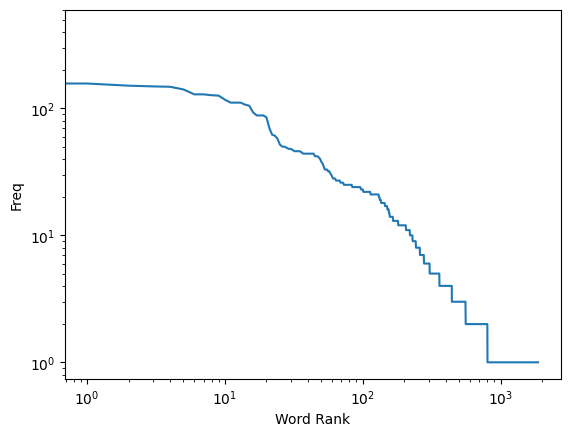

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Generating histograms of words, screen names, and hashtags

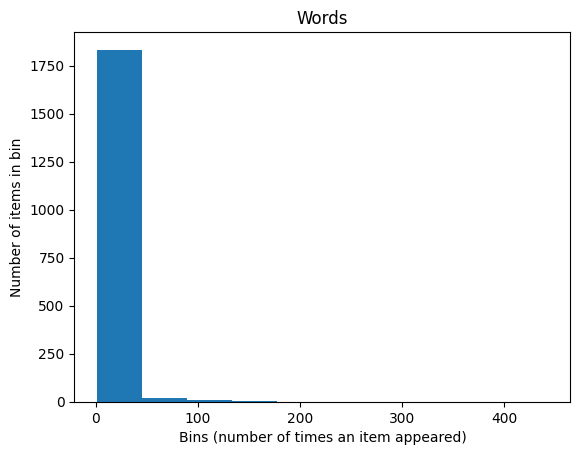

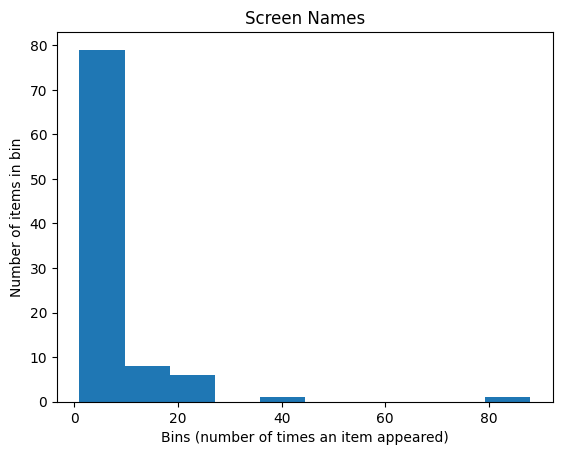

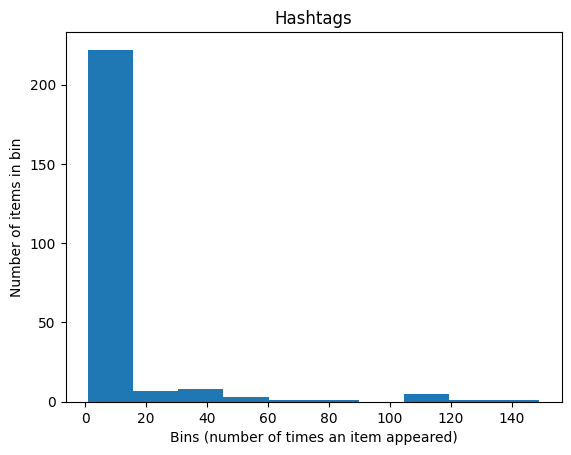

<Figure size 640x480 with 0 Axes>

In [15]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

## Generating a histogram of retweet counts

Text(0, 0.5, 'Number of tweets in bin')

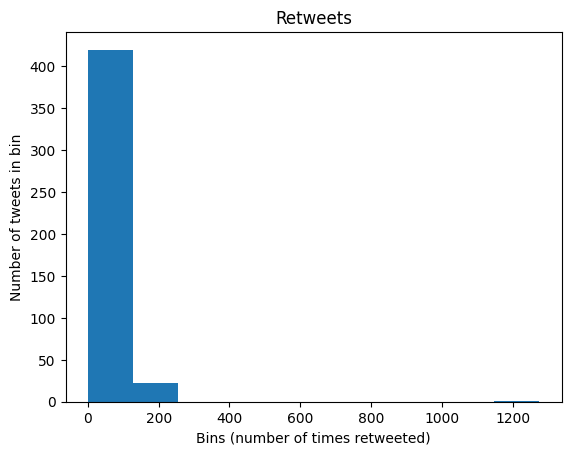

In [16]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

## Sentiment Analysis

In [17]:
# pip install nltk
import nltk
nltk.download('vader_lexicon')

import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SF624\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
tweets = tweepy.Cursor(api.search_tweets, q="Taiwan",lang='en').items(10)
#twitter_stream = twitter.TwitterStream(auth=auth)
#iterator = twitter_stream.statuses.sample()

#for tweet in tweets:    
#    print(tweet.text)

In [19]:
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet.text)
    
print(len(tweet_list))

10


In [20]:
analyzer = SentimentIntensityAnalyzer()

In [21]:
analyzer.polarity_scores('Hello')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [22]:
analyzer.polarity_scores('I really enjoy this video series.')

{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.5413}

In [23]:
analyzer.polarity_scores('I REALLY enjoy this video series.')

{'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'compound': 0.64}

In [24]:
analyzer.polarity_scores('I REALLY enjoy this video series!!!')

{'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'compound': 0.7271}

In [25]:
analyzer.polarity_scores('I REALLY did not enjoy this video series!!!')

{'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'compound': -0.6627}

In [26]:
scores = np.zeros(len(tweet_list))

for i, t in enumerate(tweet_list):
    # Extract the text portion of the tweet
    text = t
    #print (text)
    # Measure the polarity of the tweet
    polarity = analyzer.polarity_scores(text)
    #print (polarity)
    # Store the normalized, weighted composite score
    scores[i] = polarity['compound']

RT @GordonGChang: Cannot wait to talk with @cherylcasone, anchoring for @MariaBartiromo, on @FoxBusiness’s @MorningsMaria at 6:45 ET. We’re…
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
RT @stussyjimin: Park Jimin on the covers of W Korea, DA MAN, Esquire Taiwan and Elle Hong Kong magazines in 2023. https://t.co/xEEVNmAaAz
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
RT @PJM_data: Jimin x Dior 2023 magazines covers:

▪︎W Korea 🇰🇷 
▪︎DAMAN Indonesia 🇮🇩 
▪︎Esquire Taiwan 🇹🇼
▪︎ELLE Hong Kong 🇭🇰

... what's…
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
RT @NFSC_HAGnews: U.S. Defense Department Official Visits Taiwan.

The Pentagon declined to provide an explanation to the Chinese Communist…
{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'compound': 0.128}
RT @PJM_data: Jimin x Dior 2023 magazines covers:

▪︎W Korea 🇰🇷 
▪︎DAMAN Indonesia 🇮🇩 
▪︎Esquire Taiwan 🇹🇼
▪︎ELLE Hong Kong 🇭🇰

... what's…
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
RT @by_verivery: [#계현]


In [27]:
most_positive = np.argmax(scores)
most_negative = np.argmin(scores)

In [28]:
print('{0:6.3f} : "{1}"'.format(scores[most_positive], tweet_list[most_positive]))

 0.361 : "RT @by_verivery: [#계현]

Thank you Taiwan💜🤍

#GYEHYEON 
#VERIVERY https://t.co/IaSSfxSObi"


In [29]:
print('{0:6.3f} : "{1}"'.format(scores[most_negative], tweet_list[most_negative]))

 0.000 : "RT @GordonGChang: Cannot wait to talk with @cherylcasone, anchoring for @MariaBartiromo, on @FoxBusiness’s @MorningsMaria at 6:45 ET. We’re…"
